In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import boto3



In [6]:
#loading in data from personal s3 bucket
s3_client = boto3.client('s3', region_name='us-east-2')


bucket_name = 'harshil-storage'
file_key = 'v_dem_indicators_2024.csv'


response = s3_client.get_object(Bucket=bucket_name, Key=file_key)

indicators = pd.read_csv(response.get("Body"))

indicators


C:\Users\harsh\AppData\Local\Temp\ipykernel_29268\2457279278.py:11: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  indicators = pd.read_csv(response.get("Body"))


,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,...,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts
0,Mexico,MEX,3,1789,1789-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1,Mexico,MEX,3,1790,1790-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
2,Mexico,MEX,3,1791,1791-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
3,Mexico,MEX,3,1792,1792-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
4,Mexico,MEX,3,1793,1793-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27729,Piedmont-Sardinia,SPD,373,1857,1857-12-31,1,1,Kingdom of Piedmont-Sardinia,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27730,Piedmont-Sardinia,SPD,373,1858,1858-12-31,1,1,Kingdom of Piedmont-Sardinia,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27731,Piedmont-Sardinia,SPD,373,1859,1859-12-31,1,1,Kingdom of Piedmont-Sardinia [incorporates Lom...,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27732,Piedmont-Sardinia,SPD,373,1860,1860-12-31,1,1,NaN,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:


#dropping the columns that are not needed
indicators.drop(columns=['country_name', 'country_id', 'histname' ,'historical_date','project','historical',
                         'codingstart','codingend', 'codingstart_contemp', 'codingend_contemp',
                         'codingstart_hist', 'codingend_hist', 'gapstart1', 
                         'gapstart2', 'gapstart3', 'gapend1', 'gapend2', 'gapend3', 'gap_index',
                         'COWcode'], inplace=True)

In [8]:
#removing years before 1980
indicators = indicators[indicators.year >= 1980]

In [9]:
#sorting the data by country and year
indicators = indicators.sort_values(by=['country_text_id', 'year'])

In [10]:
#creating a copy of the data with only the year 2023
indicators_2023 = indicators[indicators.year == 2023]


In [11]:
indicators_2023

,country_text_id,year,v2x_polyarchy,v2x_polyarchy_codelow,v2x_polyarchy_codehigh,v2x_polyarchy_sd,v2x_libdem,v2x_libdem_codelow,v2x_libdem_codehigh,v2x_libdem_sd,...,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts
5525,AFG,2023,0.075,0.069,0.079,0.006,0.030,0.017,0.039,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16044,AGO,2023,0.349,0.308,0.386,0.042,0.173,0.145,0.201,0.029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,ALB,2023,0.510,0.435,0.559,0.061,0.402,0.353,0.449,0.050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25900,ARE,2023,0.102,0.084,0.119,0.017,0.078,0.062,0.093,0.016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5760,ARG,2023,0.840,0.802,0.894,0.049,0.690,0.638,0.750,0.057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,YEM,2023,0.130,0.116,0.146,0.015,0.048,0.035,0.059,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1065,ZAF,2023,0.687,0.625,0.750,0.062,0.584,0.527,0.643,0.058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9297,ZMB,2023,0.529,0.453,0.580,0.063,0.424,0.375,0.478,0.052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9421,ZWE,2023,0.288,0.259,0.319,0.031,0.174,0.150,0.200,0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#moving e_civil_war to the right of country_text_id and year

civil_war = indicators['e_civil_war']
indicators.drop(columns=['e_civil_war'], inplace=True)
indicators.insert(2, 'e_civil_war', civil_war)

In [13]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_polyarchy_codelow,v2x_polyarchy_codehigh,v2x_polyarchy_sd,v2x_libdem,v2x_libdem_codelow,v2x_libdem_codehigh,...,e_miurbpop,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_miinterc,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.075,0.088,0.007,0.045,0.032,0.059,...,3397.0,15112.150,0.225,39.010,13356500.0,244.0,0.0,1.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.075,0.089,0.007,0.047,0.033,0.060,...,3473.0,15067.869,0.230,39.336,13171679.0,238.0,0.0,1.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.075,0.088,0.007,0.048,0.033,0.061,...,3549.0,15023.588,0.236,39.662,12882518.0,231.0,0.0,1.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.075,0.089,0.008,0.048,0.031,0.059,...,3625.0,14979.307,0.242,39.988,12537732.0,225.0,0.0,1.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.075,0.089,0.008,0.048,0.032,0.060,...,3701.0,14935.026,0.248,40.314,12204306.0,218.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26330,ZZB,2019,NaN,0.265,0.233,0.285,0.027,0.211,0.187,0.236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26331,ZZB,2020,NaN,0.262,0.235,0.288,0.027,0.207,0.180,0.229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26332,ZZB,2021,NaN,0.273,0.244,0.299,0.030,0.220,0.193,0.243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26333,ZZB,2022,NaN,0.284,0.254,0.310,0.030,0.229,0.204,0.255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#dropping rows with empty values
indicators = indicators.dropna(subset=['e_civil_war'])

In [15]:

indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_polyarchy_codelow,v2x_polyarchy_codehigh,v2x_polyarchy_sd,v2x_libdem,v2x_libdem_codelow,v2x_libdem_codehigh,...,e_miurbpop,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_miinterc,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.075,0.088,0.007,0.045,0.032,0.059,...,3397.0,15112.150,0.225,39.010,13356500.0,244.0,0.0,1.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.075,0.089,0.007,0.047,0.033,0.060,...,3473.0,15067.869,0.230,39.336,13171679.0,238.0,0.0,1.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.075,0.088,0.007,0.048,0.033,0.061,...,3549.0,15023.588,0.236,39.662,12882518.0,231.0,0.0,1.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.075,0.089,0.008,0.048,0.031,0.059,...,3625.0,14979.307,0.242,39.988,12537732.0,225.0,0.0,1.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.075,0.089,0.008,0.048,0.032,0.060,...,3701.0,14935.026,0.248,40.314,12204306.0,218.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.240,0.288,0.025,0.167,0.138,0.187,...,NaN,NaN,NaN,NaN,11954293.0,103.0,NaN,NaN,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.239,0.287,0.025,0.156,0.133,0.179,...,NaN,NaN,NaN,NaN,11982219.0,102.0,NaN,NaN,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.226,0.268,0.023,0.152,0.129,0.174,...,NaN,NaN,NaN,NaN,12019911.0,102.0,NaN,NaN,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.228,0.269,0.021,0.151,0.129,0.174,...,NaN,NaN,NaN,NaN,12076697.0,101.0,NaN,NaN,0.0,0.0


In [16]:
#dropping columns with na values
indicators = indicators.dropna(axis=1)

In [17]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_polyarchy_codelow,v2x_polyarchy_codehigh,v2x_polyarchy_sd,v2x_partipdem,v2x_partipdem_codelow,v2x_partipdem_codehigh,...,e_gdp,e_gdp_sd,e_gdppc,e_gdppc_sd,e_pop,e_pop_sd,e_pelifeex,e_pechmor,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.075,0.088,0.007,0.023,0.011,0.031,...,2573.238,153.394,1.743,0.096,1476.904,43.689,43.7,244.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.075,0.089,0.007,0.023,0.011,0.032,...,2631.751,159.769,1.840,0.102,1430.385,43.485,44.3,238.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.075,0.088,0.007,0.023,0.010,0.030,...,2691.365,155.699,1.947,0.098,1382.088,41.887,44.1,231.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.075,0.089,0.008,0.023,0.012,0.032,...,2729.018,157.411,2.018,0.101,1352.651,38.894,42.3,225.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.075,0.089,0.008,0.023,0.012,0.032,...,2722.819,151.093,2.033,0.105,1339.467,39.007,39.9,218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.240,0.288,0.025,0.223,0.208,0.242,...,3804.731,154.595,2.917,0.115,1304.472,29.762,46.6,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.239,0.287,0.025,0.219,0.199,0.235,...,3243.942,141.115,2.506,0.098,1294.554,29.892,46.4,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.226,0.268,0.023,0.214,0.197,0.232,...,2941.988,117.954,2.273,0.083,1294.754,32.244,46.4,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.228,0.269,0.021,0.210,0.195,0.228,...,2705.078,114.328,2.085,0.081,1297.543,33.799,46.8,101.0,0.0,0.0


In [18]:
#dropping columns with codelow or codehigh in name
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='codelow')))]
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='codehigh')))]

In [19]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_polyarchy_sd,v2x_partipdem,v2x_partipdem_sd,v2x_delibdem,v2x_delibdem_sd,v2x_egaldem,...,e_gdp,e_gdp_sd,e_gdppc,e_gdppc_sd,e_pop,e_pop_sd,e_pelifeex,e_pechmor,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.007,0.023,0.012,0.025,0.015,0.114,...,2573.238,153.394,1.743,0.096,1476.904,43.689,43.7,244.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.007,0.023,0.012,0.029,0.016,0.115,...,2631.751,159.769,1.840,0.102,1430.385,43.485,44.3,238.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.007,0.023,0.012,0.029,0.016,0.115,...,2691.365,155.699,1.947,0.098,1382.088,41.887,44.1,231.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.008,0.023,0.012,0.029,0.016,0.115,...,2729.018,157.411,2.018,0.101,1352.651,38.894,42.3,225.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.008,0.023,0.012,0.029,0.016,0.115,...,2722.819,151.093,2.033,0.105,1339.467,39.007,39.9,218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.025,0.223,0.018,0.188,0.038,0.161,...,3804.731,154.595,2.917,0.115,1304.472,29.762,46.6,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.025,0.219,0.019,0.187,0.038,0.151,...,3243.942,141.115,2.506,0.098,1294.554,29.892,46.4,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.023,0.214,0.018,0.183,0.037,0.146,...,2941.988,117.954,2.273,0.083,1294.754,32.244,46.4,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.021,0.210,0.017,0.183,0.036,0.167,...,2705.078,114.328,2.085,0.081,1297.543,33.799,46.8,101.0,0.0,0.0


In [20]:
#dropping columns with sd in name
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='sd')))]

In [21]:
#dropping columns with ord in name
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='ord')))]

In [22]:
#dropping columns with mean in name
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='mean')))]

In [23]:
#dropping columns with osp in name
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='osp')))]

In [24]:
#if column has nr in name, subset drop with this column and drop rows with a value of 3 or less at this column

#getting list of columns with nr in name
nr_columns = list(indicators.filter(regex='nr'))

#getting subset of nr columns
nr_indicators = indicators[nr_columns]

#replacing values less than 3 with NaN
nr_indicators.replace({3:None}, inplace=True)

#dropping rows with NaN
nr_indicators.dropna(axis=0, inplace=True)

#only selecting rows that are in the nr_indicators
indicators = indicators[indicators.index.isin(nr_indicators.index)]


C:\Users\harsh\AppData\Local\Temp\ipykernel_29268\2168371957.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nr_indicators.replace({3:None}, inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_29268\2168371957.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nr_indicators.dropna(axis=0, inplace=True)


In [25]:
#dropping columns with nr in name
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='nr')))]

In [26]:
#dropping columns with e_v2x in name
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='e_v2x')))]

In [27]:
#removing columns that end with a number
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='\d+$')))]

In [28]:
#removing columns that have the word region
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='region')))]

In [29]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_api,v2x_mpi,v2x_freexp_altinf,...,e_uds_median,e_chga_demo,e_area,e_gdp,e_gdppc,e_pop,e_pelifeex,e_pechmor,e_pt_coup,e_pt_coup_attempts
5503,AFG,2001,1.0,0.083,0.019,0.013,0.045,0.167,0.000,0.080,...,-1.590,0.0,643557.141,1817.853,0.765,2375.936,54.8,125.0,0.0,0.0
5504,AFG,2002,0.0,0.225,0.095,0.249,0.149,0.449,0.000,0.619,...,-0.866,0.0,643557.141,2209.482,0.893,2475.663,55.5,121.0,0.0,0.0
5505,AFG,2003,0.0,0.230,0.098,0.256,0.159,0.461,0.000,0.675,...,-0.877,0.0,643557.141,2487.328,0.965,2577.261,56.5,117.0,0.0,0.0
5506,AFG,2004,0.0,0.240,0.109,0.255,0.161,0.479,0.000,0.671,...,-0.696,0.0,643557.141,2667.526,1.005,2655.691,57.1,113.0,0.0,0.0
5507,AFG,2005,0.0,0.339,0.138,0.298,0.212,0.609,0.069,0.689,...,-0.227,0.0,643557.141,2912.684,1.061,2746.122,57.6,109.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.223,0.188,0.161,0.514,0.017,0.379,...,-0.523,0.0,391930.531,3804.731,2.917,1304.472,46.6,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.219,0.187,0.151,0.514,0.016,0.379,...,-0.526,0.0,391930.531,3243.942,2.506,1294.554,46.4,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.214,0.183,0.146,0.490,0.012,0.282,...,-0.601,0.0,391930.531,2941.988,2.273,1294.754,46.4,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.210,0.183,0.167,0.490,0.011,0.288,...,-0.598,0.0,391930.531,2705.078,2.085,1297.543,46.8,101.0,0.0,0.0


In [30]:
#setting index to country_text_id and year
indicators.set_index(['country_text_id', 'year'], inplace=True)

In [31]:
#dropping columns that are not type int or float
indicators = indicators.select_dtypes(include=['int64', 'float64'])

In [32]:
#separrating the data into features and target
X = indicators.drop(columns=['e_civil_war'])
y = indicators['e_civil_war']

In [33]:
#dropping columns in the 2023 data that are more than 30% empty
indicators_2023 = indicators_2023.dropna(thresh=indicators_2023.shape[0]*0.3, axis=1)

In [34]:
indicators_2023

,country_text_id,year,v2x_polyarchy,v2x_polyarchy_codelow,v2x_polyarchy_codehigh,v2x_polyarchy_sd,v2x_libdem,v2x_libdem_codelow,v2x_libdem_codehigh,v2x_libdem_sd,...,e_v2x_freexp_5C,e_v2xel_regelec_3C,e_v2xel_regelec_4C,e_v2xel_regelec_5C,e_peaveduc,e_area,e_regiongeo,e_regionpol,e_regionpol_6C,e_regionpol_7C
5525,AFG,2023,0.075,0.069,0.079,0.006,0.030,0.017,0.039,0.011,...,0.00,0.0,0.000,0.00,3.813,643557.141,14,8.0,6,7
16044,AGO,2023,0.349,0.308,0.386,0.042,0.173,0.145,0.201,0.029,...,0.50,0.0,0.000,0.00,2.980,1254965.956,7,4.0,4,4
1882,ALB,2023,0.510,0.435,0.559,0.061,0.402,0.353,0.449,0.050,...,0.75,0.5,0.333,0.50,NaN,28680.714,3,1.0,1,1
25900,ARE,2023,0.102,0.084,0.119,0.017,0.078,0.062,0.093,0.016,...,0.00,0.0,0.000,0.00,NaN,70685.174,10,3.0,3,3
5760,ARG,2023,0.840,0.802,0.894,0.049,0.690,0.638,0.750,0.057,...,1.00,1.0,1.000,1.00,8.770,2787442.098,18,2.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,YEM,2023,0.130,0.116,0.146,0.015,0.048,0.035,0.059,0.013,...,0.25,0.5,0.333,0.50,NaN,456146.699,10,3.0,3,3
1065,ZAF,2023,0.687,0.625,0.750,0.062,0.584,0.527,0.643,0.058,...,1.00,1.0,1.000,1.00,7.880,1224585.797,9,4.0,4,4
9297,ZMB,2023,0.529,0.453,0.580,0.063,0.424,0.375,0.478,0.052,...,1.00,0.5,0.333,0.25,6.354,756428.205,8,4.0,4,4
9421,ZWE,2023,0.288,0.259,0.319,0.031,0.174,0.150,0.200,0.025,...,0.25,0.0,0.000,0.00,7.918,391930.531,8,4.0,4,4


In [35]:
#removing columns in X that are not in the 2023 data
X = pd.DataFrame(X)
X = X[X.columns.intersection(indicators_2023.columns)]

In [36]:
X

v2x_polyarchy  v2x_partipdem  v2x_delibdem  v2x_egaldem  \
country_text_id year                                                            
AFG             2001          0.083          0.019         0.013        0.045   
                2002          0.225          0.095         0.249        0.149   
                2003          0.230          0.098         0.256        0.159   
                2004          0.240          0.109         0.255        0.161   
                2005          0.339          0.138         0.298        0.212   
...                             ...            ...           ...          ...   
ZWE             2002          0.266          0.223         0.188        0.161   
                2003          0.265          0.219         0.187        0.151   
                2004          0.252          0.214         0.183        0.146   
                2005          0.251          0.210         0.183        0.167   
                2006          0.250          0.208         0.182        0.168   

                      v2x_api  v2x_mpi  v2x_freexp_altinf  v2x_frassoc_thick  \
country_text_id year                                                           
AFG             2001    0.167    0.000              0.080              0.079   
                2002    0.449    0.000              0.619              0.675   
                2003    0.461    0.000              0.675              0.675   
                2004    0.479    0.000              0.671              0.684   
                2005    0.609    0.069              0.689              0.702   
...                       ...      ...                ...                ...   
ZWE             2002    0.514    0.017              0.379              0.579   
                2003    0.514    0.016              0.379              0.581   
                2004    0.490    0.012              0.282              0.581   
                2005    0.490    0.011              0.288              0.606   
                2006    0.489    0.012              0.279              0.617   

                      v2x_suffr  v2xel_frefair  ...  v2xcl_disc  \
country_text_id year                            ...               
AFG             2001        1.0          0.000  ...       0.065   
                2002        1.0          0.000  ...       0.589   
                2003        1.0          0.000  ...       0.589   
                2004        1.0          0.063  ...       0.589   
                2005        1.0          0.280  ...       0.600   
...                         ...            ...  ...         ...   
ZWE             2002        1.0          0.082  ...       0.148   
                2003        1.0          0.079  ...       0.148   
                2004        1.0          0.079  ...       0.148   
                2005        1.0          0.073  ...       0.148   
                2006        1.0          0.076  ...       0.148   

                      v2xel_elecparl  v2xlg_leginter  v2xel_elecpres  \
country_text_id year                                                   
AFG             2001               0               0               0   
                2002               0               0               0   
                2003               0               0               0   
                2004               0               0               1   
                2005               1               0               0   
...                              ...             ...             ...   
ZWE             2002               0               0               1   
                2003               0               0               0   
                2004               0               0               0   
                2005               1               0               0   
                2006               0               0               0   

                      v2x_hosinter  v2x_hosabort  v2x_legabort  v2xex_elecleg  \
country_text_id year                 

In [37]:
#scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [38]:
#applying PCA
pca = PCA(n_components=45)
X_pca = pca.fit_transform(X)


In [39]:
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

0.9032256925308527


In [40]:
X_pca = pd.DataFrame(X_pca)

In [41]:
X_pca

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-16.379054,-0.089663,-5.708047,-3.148983,-1.095862,1.372703,-0.336913,0.911771,-0.287524,-1.828016,...,-0.953855,0.915544,-1.805163,0.031287,0.863052,-0.071964,-0.822932,1.555705,0.779692,-0.702155
1,-5.656374,3.618604,-6.773528,-3.312569,0.144387,-0.495901,-2.662264,0.506984,0.190272,-1.746336,...,-0.224760,-0.044121,-1.287718,-0.023211,-0.309667,-0.929058,-1.020261,0.410254,0.387323,-0.478960
2,-5.147076,3.828909,-6.800911,-3.297380,0.313769,-0.649808,-2.809004,0.379466,0.155089,-1.629416,...,-0.231216,-0.099186,-1.309627,-0.132287,-0.341953,-1.011980,-0.802468,0.137228,0.332859,-0.436393
3,-4.156024,5.586014,-2.956603,-0.590450,-1.266972,0.406876,-1.475667,-0.614233,-1.002339,-2.693911,...,0.541303,1.745671,-1.347896,-0.233081,0.866216,-1.527880,-1.312716,0.986683,0.711592,0.152691
4,-3.387679,5.427700,-2.149086,-0.324872,-2.103629,0.777999,-0.856741,-0.916584,-1.126788,-2.713752,...,-0.223005,1.474797,-1.724707,-1.025523,0.628762,-1.143375,-1.400325,0.515917,-0.667133,-1.804568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,-3.378845,3.933946,2.678360,1.337445,1.040819,-1.369345,0.867513,1.008076,1.137712,3.250226,...,2.764762,-0.474269,0.548547,1.304746,-0.290850,-0.998890,0.115441,1.808737,0.666912,0.607421
2502,-3.681117,3.904824,2.615759,1.140567,0.882292,-1.405391,0.896206,0.958729,1.278614,3.481181,...,2.248455,-0.803448,0.405510,0.909488,-0.426277,-0.902665,-0.327228,1.306993,-0.091011,-0.418277
2503,-3.927697,3.613975,2.747416,1.364600,1.001994,-1.374514,1.011329,0.862444,1.195548,3.573172,...,2.146700,-0.769377,0.305839,1.059060,-0.270120,-0.793391,-0.171582,1.075128,-0.072498,-0.343416
2504,-3.765663,3.503246,2.626401,1.442703,0.908344,-1.576326,0.706920,0.939422,0.913017,3.485161,...,1.347028,-0.499024,-0.069368,0.276898,-0.505592,-0.609353,0.299971,0.714602,-0.331206,-0.661091


In [42]:
#transforming civil war column to a dataframe
y = pd.DataFrame(y)

array([[<Axes: title={'center': 'e_civil_war'}>]], dtype=object)

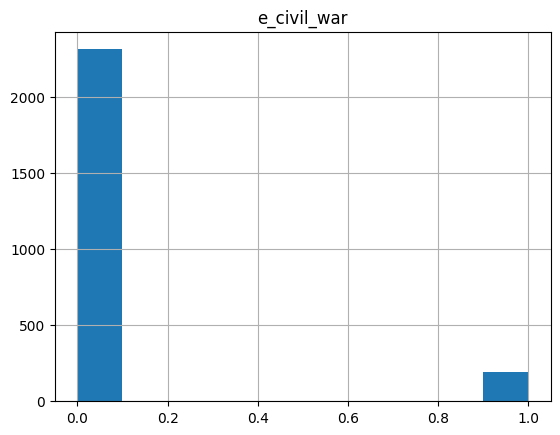

In [43]:
#visualising distriubtion of classes
y.hist()